In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
data = pd.read_csv('sales_data.csv')

In [7]:
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [9]:
print(data.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [13]:
print(data.head)

<bound method NDFrame.head of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>


In [15]:
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [17]:
data = data.dropna()

In [23]:
label_encoder = LabelEncoder()
data['TV'] = label_encoder.fit_transform(data['TV'])
data['Radio'] = label_encoder.fit_transform(data['Radio'])

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    int64  
 2   Radio       200 non-null    int64  
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.9 KB
None


In [33]:
scaler = StandardScaler()
data[['Newspaper']] = scaler.fit_transform(data[['Newspaper']])

In [35]:
print(data.head)

<bound method NDFrame.head of      Unnamed: 0   TV  Radio  Newspaper     Sales
0             1  153    131   1.778945  1.552053
1             2   32    136   0.669579 -0.696046
2             3   12    156   1.783549 -0.907406
3             4   98    142   1.286405  0.860330
4             5  112     41   1.281802 -0.215683
..          ...  ...    ...        ...       ...
195         196   28     18  -0.771217 -1.234053
196         197   63     21  -1.033598 -0.830548
197         198  111     35  -1.111852 -0.234898
198         199  181    145   1.640850  2.205347
199         200  154     34  -1.005979 -0.119610

[200 rows x 5 columns]>


In [37]:
X = data[['Newspaper', 'TV', 'Radio']]  # Features
y = data['Sales'] 

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Display coefficients
print(f"Model coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Model coefficients: [0.01293502 0.01344629 0.01093727]
Intercept: -2.1682187857259665


Mean Squared Error (MSE): 0.11970281488735401
R-squared (R²): 0.8972791312715285


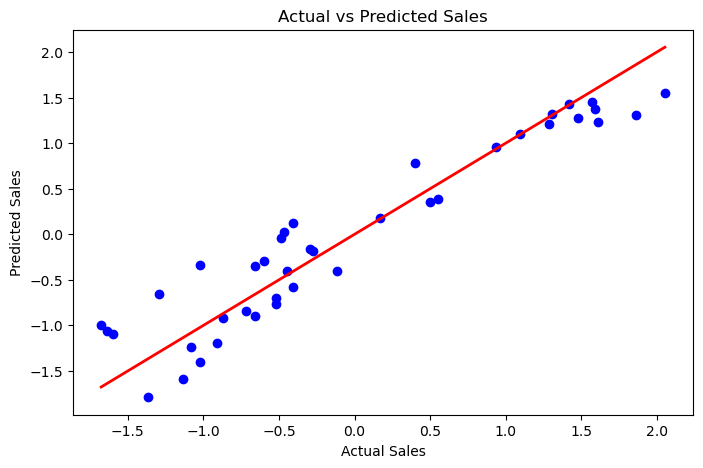

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualizing the prediction vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming the label encoder and scaler are already fitted
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Example for new data prediction
new_data = pd.DataFrame({
    'Newspaper': [5000],  # Example ad spend
    'TV': ['Online'],  # Platform encoding (Online -> need encoding)
    'Radio': ['Adults']  # Customer Segment encoding (Adults -> need encoding)
})

# Label encode categorical variables ('TV' and 'Radio')
new_data['TV'] = label_encoder.fit_transform(new_data['TV'])  # Transform 'Online' to numerical value
new_data['Radio'] = label_encoder.fit_transform(new_data['Radio'])  # Transform 'Adults' to numerical value

# Scale the 'Newspaper' feature (if scaling was done earlier on the training data)
new_data[['Newspaper']] = scaler.fit_transform(new_data[['Newspaper']])

# Now, new_data is ready for prediction
# Assuming 'model' is the trained machine learning model
predicted_sales = model.predict(new_data)

print(f"Predicted Sales: {predicted_sales[0]}")


Predicted Sales: -2.1682187857259665
